In [1]:
# Clean and Balance Diabetic Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv("diabetic_data.csv")
print("Original shape:", df.shape)

Original shape: (101766, 50)


In [13]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [14]:
df['age'].unique()


array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

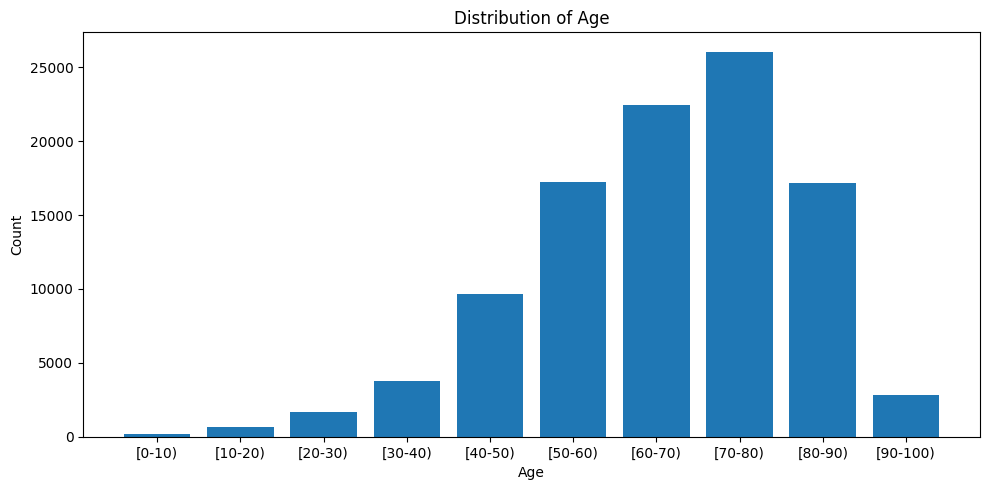

In [15]:
import matplotlib.pyplot as plt

# Count each unique age
age_counts = df['age'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.tight_layout()
plt.show()


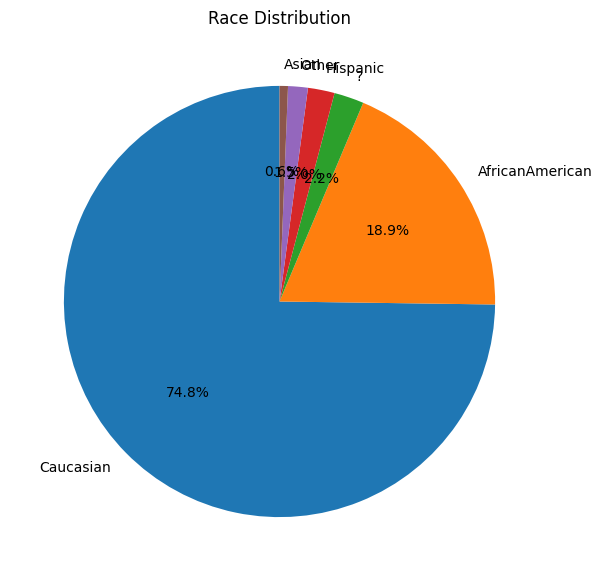

In [16]:
import matplotlib.pyplot as plt

# Count each category
race_counts = df['race'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    race_counts.values,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Race Distribution")
plt.show()


In [17]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [8]:
df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [9]:
df['number_diagnoses'].unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [10]:
df['metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [11]:
df['repaglinide'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [12]:
df['nateglinide'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [13]:
df['chlorpropamide'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [14]:
df['glimepiride'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [15]:
df['acetohexamide'].unique()

array(['No', 'Steady'], dtype=object)

In [16]:
df['glipizide'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [17]:
df['glyburide'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [18]:
df['tolbutamide'].unique()

array(['No', 'Steady'], dtype=object)

In [19]:
df['pioglitazone'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [20]:
df['rosiglitazone'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [21]:
df['acarbose'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [22]:
df['miglitol'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [23]:
df['troglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [24]:
df['tolazamide'].unique()

array(['No', 'Steady', 'Up'], dtype=object)

In [25]:
df['examide'].unique()

array(['No'], dtype=object)

In [26]:

df['citoglipton'].unique()

array(['No'], dtype=object)

In [27]:
df['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [28]:
df['glyburide-metformin'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [34]:
df['glipizide-metformin'].unique()

array(['No', 'Steady'], dtype=object)

In [35]:
df['glimepiride-pioglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [36]:
df['metformin-rosiglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [37]:
df['metformin-pioglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [38]:
df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [39]:
df['diabetesMed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [18]:
df['readmitted'].value_counts()


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [22]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

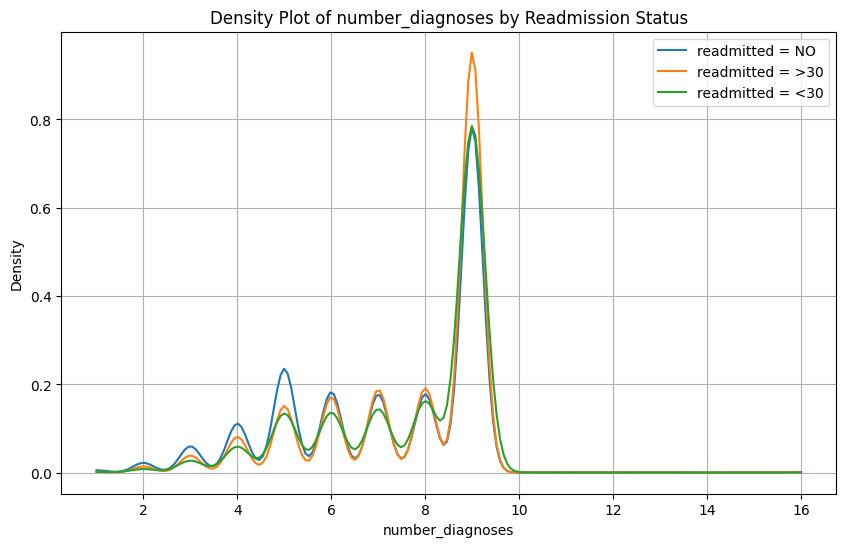

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

plt.figure(figsize=(10,6))

# Get unique categories
categories = df['readmitted'].dropna().unique()

for cat in categories:
    group_data = df[df['readmitted'] == cat]['number_diagnoses'].dropna()
    
    if len(group_data) > 1:   # KDE needs >=2 points
        kde = gaussian_kde(group_data)
        x = np.linspace(group_data.min(), group_data.max(), 200)
        plt.plot(x, kde(x), label=f"readmitted = {cat}")

plt.title("Density Plot of number_diagnoses by Readmission Status")
plt.xlabel("number_diagnoses")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


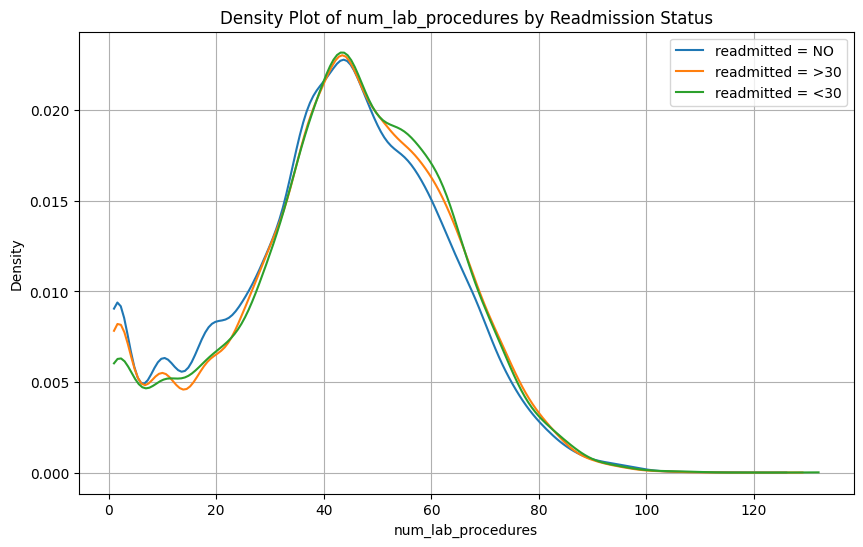

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

plt.figure(figsize=(10,6))

# Get unique categories
categories = df['readmitted'].dropna().unique()

for cat in categories:
    group_data = df[df['readmitted'] == cat]['num_lab_procedures'].dropna()
    
    if len(group_data) > 1:   # KDE needs >=2 points
        kde = gaussian_kde(group_data)
        x = np.linspace(group_data.min(), group_data.max(), 200)
        plt.plot(x, kde(x), label=f"readmitted = {cat}")

plt.title("Density Plot of num_lab_procedures by Readmission Status")
plt.xlabel("num_lab_procedures")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()
